# Data Mining using Python 
> Required for Big Data Technologies (ITS66904) Assignment 1

Dataset available at [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/502/online+retail+ii).

The Online Retail II dataset contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011. The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

## Import libraries 

I'll be using the following libraries for this notebook. 

1. **Pandas**: For data manipulation and analysis.
2. **NumPy**: For numerical computations.
3. **Scikit-learn**: For machine learning and data mining algorithms.
4. **Matplotlib** and **Seaborn**: For data visualization.

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from mlxtend.frequent_patterns import apriori, association_rules

## Read the dataset

The Online Retail II dataset is in the `xlsx` file format. Since, reading `xlsx` files are very slow, we can read it once and convert it into a pickle for reading it next time. Converting the dataset into a pickle isn't necessary but can be helpful when read times are very high.

In [2]:
dataset_folder = "./dataset/online+retail+ii/"
try:
    df = pd.read_pickle(f"{dataset_folder}/online_retail_ii.pickle")
except:
    df = pd.read_excel(f"{dataset_folder}/online_retail_II.xlsx", engine="openpyxl")
    df.to_pickle(f"{dataset_folder}/online_retail_ii.pickle")

In [3]:
df.shape

(525461, 8)

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


## Preprocessing
These just include renaming the columns, removing null values, adding columns for ease, and so on...

In [7]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [8]:
new_columns = {
    "Invoice": "invoice",
    "StockCode": "stock_code",
    "Description": "description", 
    "Quantity": "quantity",
    "InvoiceDate": "invoice_date", 
    "Price": "price", 
    "Customer ID": "customer_id", 
    "Country": "country"
}

df = df.rename(columns=new_columns)

In [9]:
df

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [10]:
df.isnull().sum()

invoice              0
stock_code           0
description       2928
quantity             0
invoice_date         0
price                0
customer_id     107927
country              0
dtype: int64

In [11]:
print("Number of rows with negative quantities: ", (df['quantity'] < 0).sum())

Number of rows with negative quantities:  12326


In [12]:
# only see records where customer_id is null
df[df["customer_id"].isna()] 

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


Negative quantities just mean that the items were returned.

In [13]:
df[df['customer_id'].isna()]

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [14]:
df.loc[df['invoice'] == 489525]

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom


In [15]:
df.loc[df['invoice'] == 489464]

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom


### Handling null values

In [16]:
df.isna().sum()

invoice              0
stock_code           0
description       2928
quantity             0
invoice_date         0
price                0
customer_id     107927
country              0
dtype: int64

In [17]:
null_customer_transactions = df[df['customer_id'].isnull()]
null_customer_transactions.insert(loc=8, column='total_amount', value=null_customer_transactions['quantity'] * null_customer_transactions['price'])
print(null_customer_transactions['invoice'].nunique())
print(null_customer_transactions['total_amount'].sum())
print(null_customer_transactions['invoice_date'].min())
print(null_customer_transactions['invoice_date'].max())

5229
1191276.0599999998
2009-12-01 10:52:00
2010-12-09 17:25:00


In [18]:
total_transactions = df.shape[0]
null_customer_percentage = (107927 / total_transactions) * 100
print(f"Percentage of transactions with null customer IDs: {null_customer_percentage:.2f}%")

Percentage of transactions with null customer IDs: 20.54%


Dropping rows with null `customer_id` would lose us a substantial amount of data. So, instead these could be filled out with something like "Unknown". Regardless, it is still data important for the retailer.

In [19]:
df['customer_id'] = df['customer_id'].fillna("Unknown Customer")
df['description'] = df['description'].fillna("No description available.")

df_known_customers = df.loc[df['customer_id'] != "Unknown Customer"]
df_unknown_customers = df.loc[df['customer_id'] == "Unknown Customer"]

In [20]:
df_known_customers

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [21]:
df_unknown_customers

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,Unknown Customer,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,Unknown Customer,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,Unknown Customer,United Kingdom
470,489521,21646,No description available.,-50,2009-12-01 11:44:00,0.00,Unknown Customer,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,Unknown Customer,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,No description available.,-18,2010-12-09 17:17:00,0.00,Unknown Customer,United Kingdom
525232,538158,20892,No description available.,-32,2010-12-09 17:17:00,0.00,Unknown Customer,United Kingdom
525233,538160,20956,No description available.,288,2010-12-09 17:18:00,0.00,Unknown Customer,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,Unknown Customer,United Kingdom


### Add a `total_sale` column

In [22]:
df['total_sale'] = df['quantity'] * df['price']

### Purchases and Returns
We also realized that there were values in the `quantity` column which were negative. Those values simply indicated item returns

In [23]:
purchases = df[df['quantity'] > 0]
returns = df[df['quantity'] < 0]

In [24]:
returns.head()

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country,total_sale
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.4
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,-9.9
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,-17.0
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,-12.6
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.4


In [25]:
purchases.head()

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country,total_sale
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


## Exploratory Data Analysis (EDA)

C:\Users\amoghshakya\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\amoghshakya\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\amoghshakya\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


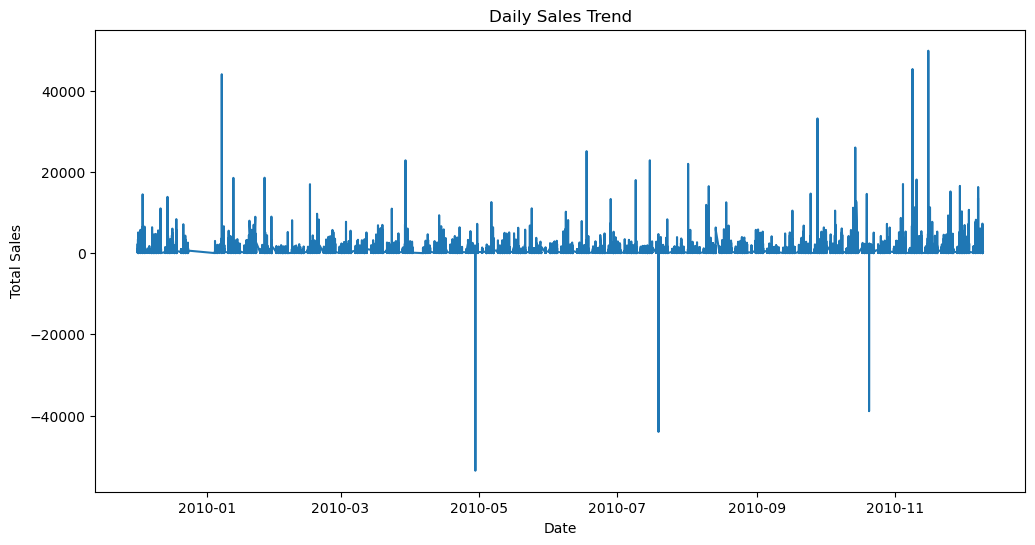

In [26]:
# Plot daily sales trend 
daily_sales = purchases.groupby('invoice_date')['total_sale'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['invoice_date'], daily_sales['total_sale'])
plt.title('Daily Sales Trend')
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

In [27]:
purchases.loc[purchases['total_sale'] < 0]

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country,total_sale
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,Unknown Customer,United Kingdom,-53594.36
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,Unknown Customer,United Kingdom,-44031.79
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,Unknown Customer,United Kingdom,-38925.87


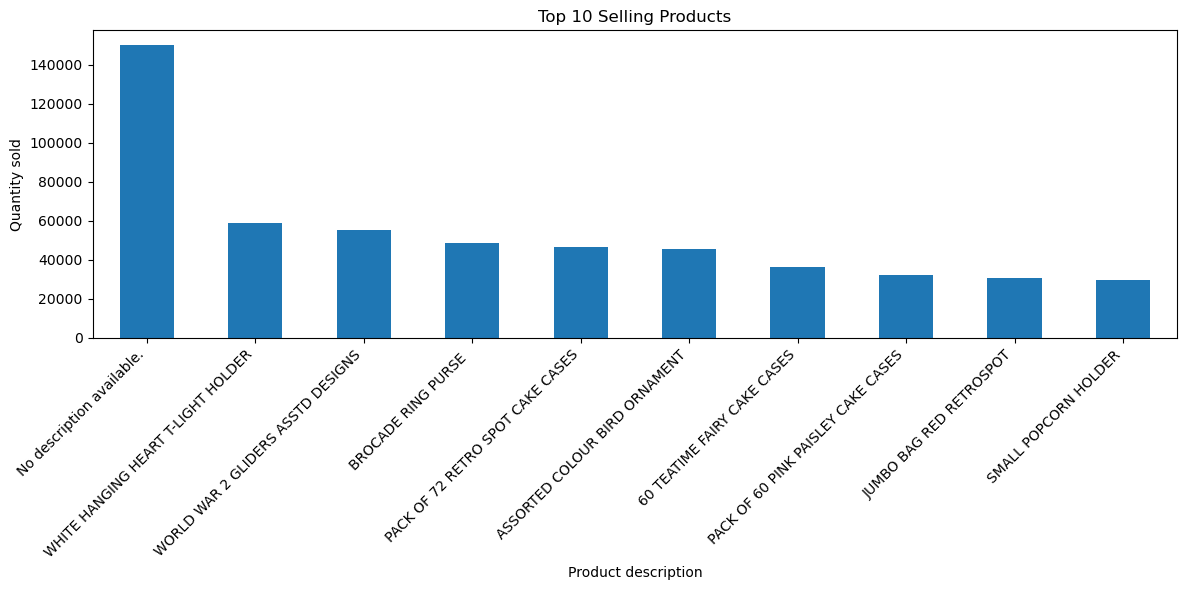

In [28]:
top_products = purchases.groupby('description')['quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(12, 6))
plt.title("Top 10 Selling Products")
plt.xlabel("Product description")
plt.ylabel("Quantity sold")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Visualize data

In [29]:
df.columns

Index(['invoice', 'stock_code', 'description', 'quantity', 'invoice_date',
       'price', 'customer_id', 'country', 'total_sale'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice       525461 non-null  object        
 1   stock_code    525461 non-null  object        
 2   description   525461 non-null  object        
 3   quantity      525461 non-null  int64         
 4   invoice_date  525461 non-null  datetime64[ns]
 5   price         525461 non-null  float64       
 6   customer_id   525461 non-null  object        
 7   country       525461 non-null  object        
 8   total_sale    525461 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 36.1+ MB


In [31]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

df = df.set_index('invoice_date')
print(df.index)

DatetimeIndex(['2009-12-01 07:45:00', '2009-12-01 07:45:00',
               '2009-12-01 07:45:00', '2009-12-01 07:45:00',
               '2009-12-01 07:45:00', '2009-12-01 07:45:00',
               '2009-12-01 07:45:00', '2009-12-01 07:45:00',
               '2009-12-01 07:46:00', '2009-12-01 07:46:00',
               ...
               '2010-12-09 20:01:00', '2010-12-09 20:01:00',
               '2010-12-09 20:01:00', '2010-12-09 20:01:00',
               '2010-12-09 20:01:00', '2010-12-09 20:01:00',
               '2010-12-09 20:01:00', '2010-12-09 20:01:00',
               '2010-12-09 20:01:00', '2010-12-09 20:01:00'],
              dtype='datetime64[ns]', name='invoice_date', length=525461, freq=None)


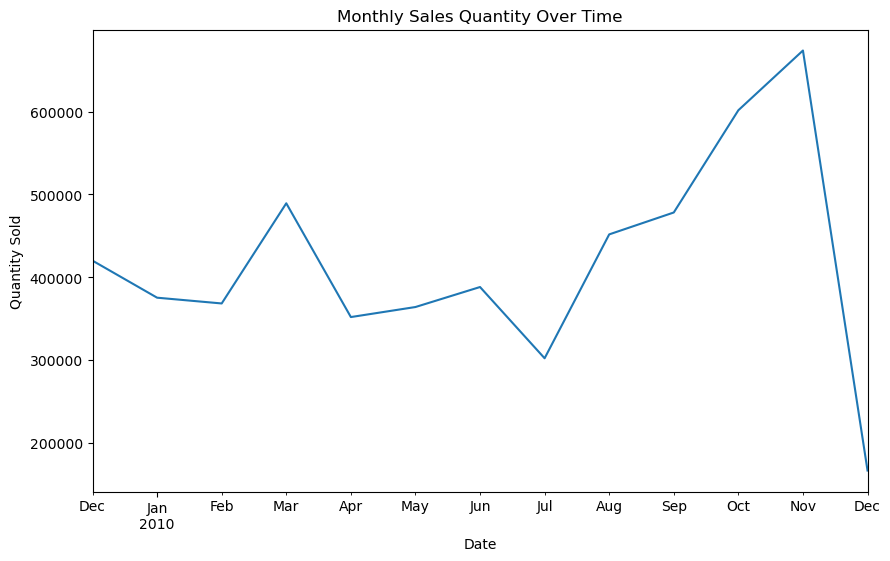

In [32]:
monthly_sales = df['quantity'].resample('ME').sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title("Monthly Sales Quantity Over Time")
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()

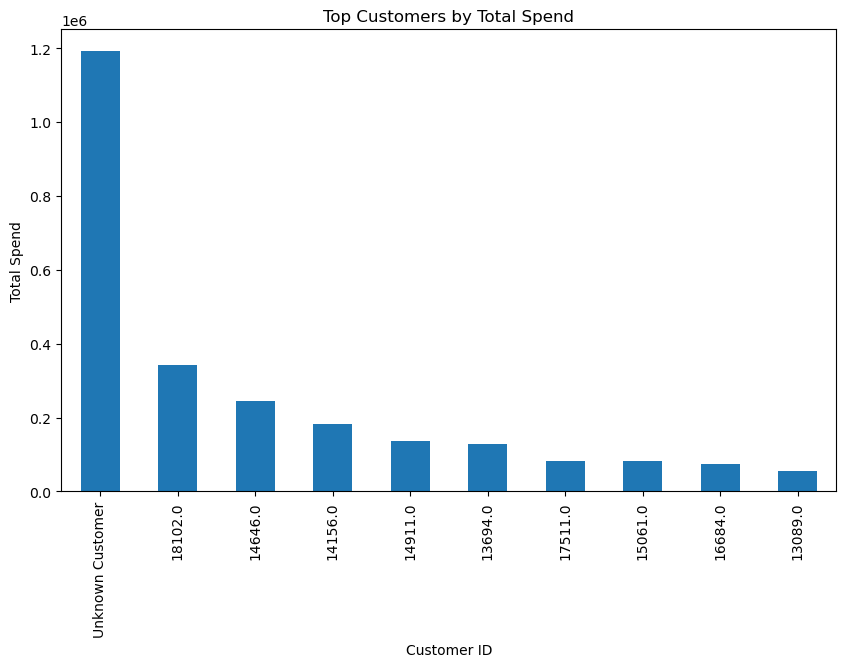

In [33]:
df['total_spend'] = df['quantity'] * df['price']
top_customers = df.groupby('customer_id')['total_spend'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar')
plt.title("Top Customers by Total Spend")
plt.xlabel("Customer ID")
plt.ylabel("Total Spend")
plt.show()

## RFM Analysis
Recency, Frequency, Monetary

In [34]:
df = df.reset_index()

In [35]:
def rfm_analysis(df):
    snapshot_date = df['invoice_date'].max() + pd.Timedelta(days=1)
    rfm = df.groupby('customer_id').agg({
        'invoice_date': lambda x: (snapshot_date - x.max()).days,
        'invoice': 'count',
        'total_sale': 'sum'
    })
    rfm.columns = ['recency', 'frequency', 'monetary']
    return rfm

rfm = rfm_analysis(purchases)
rfm.head()

,recency,frequency,monetary
customer_id,,,
12346.0,165,33,372.86
12347.0,3,71,1323.32
12348.0,74,20,222.16
12349.0,43,102,2671.14
12351.0,11,21,300.93


## Data Mining Algorithms

### Normalizing the data

In [36]:
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm)

df_rfm_normalized = pd.DataFrame(rfm_normalized, columns=['Recency', 'Frequency', 'Monetary'], index=rfm.index)

### Clustering (K-means)

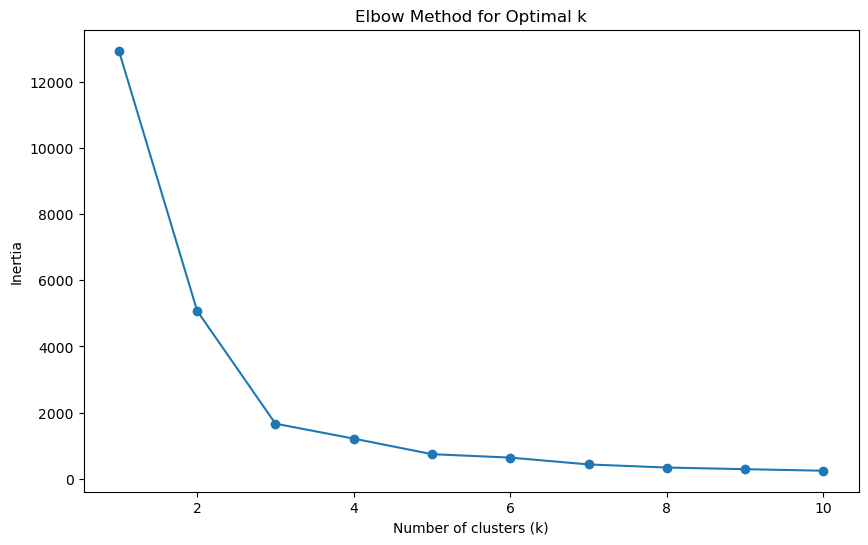

In [37]:
# Elbow method for Optimal k

inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_rfm_normalized)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [38]:
optimal_k = 3 # from the elbow method

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['cluster'] = kmeans.fit_predict(rfm_normalized)

#### Visualize the clusters

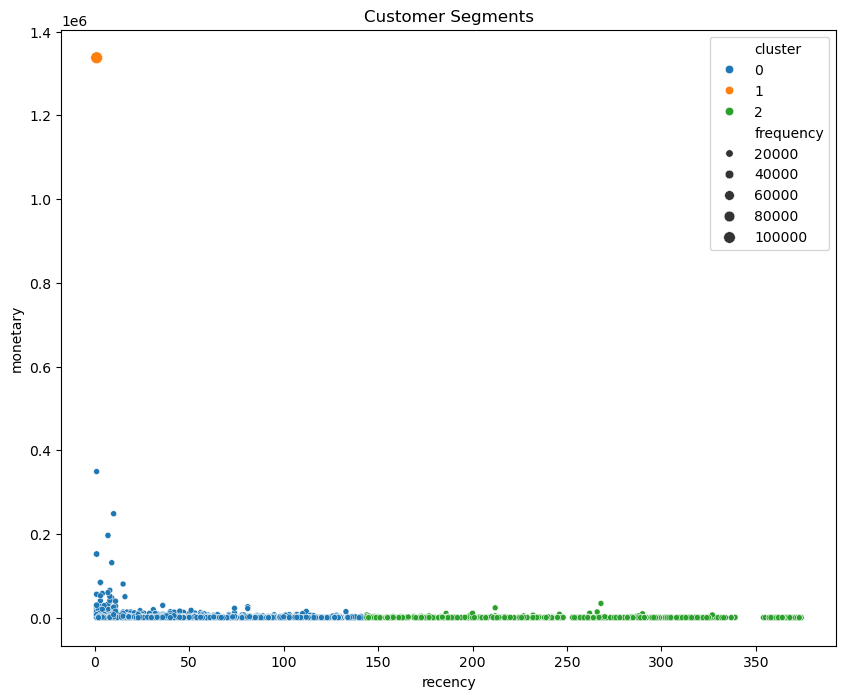

In [43]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=rfm, x='recency', y='monetary', hue='cluster', size='frequency', palette="tab10")
plt.title("Customer Segments")
plt.show()

In [44]:
cluster_stats = rfm.reset_index().groupby('cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'customer_id': 'count'
}).rename(columns={'customer_id': 'Count'})

print("Cluster Statistics:")
print(cluster_stats)

Cluster Statistics:
            recency      frequency      monetary  Count
cluster                                                
0         42.617737     114.810703  2.498756e+03   3270
1          1.000000  105440.000000  1.337710e+06      1
2        243.654215      30.904215  6.332111e+02   1044


### Association Rule Mining

In [49]:
# Bad Performance
N = 100
top_items = purchases['description'].value_counts().nlargest(N).index

df_filtered = purchases[purchases['description'].isin(top_items)]

basket = (df_filtered.groupby(['invoice', 'description'])['quantity']\
         .sum().unstack().reset_index().fillna(0).set_index('invoice'))

basket_encoded = (basket > 0).astype(bool)

frequent_itemset = apriori(basket_encoded, min_support=0.01, use_colnames=True) 

rules = association_rules(frequent_itemset, metric="lift", min_threshold=1) 

rules.sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1188,"(WOODEN FRAME ANTIQUE WHITE , WOOD 2 DRAWER CA...","(WOODEN PICTURE FRAME WHITE FINISH, WOOD S/3 C...",0.017394,0.015341,0.010893,0.626230,40.821318,0.010626,2.634395,0.992771
1185,"(WOODEN PICTURE FRAME WHITE FINISH, WOOD S/3 C...","(WOODEN FRAME ANTIQUE WHITE , WOOD 2 DRAWER CA...",0.015341,0.017394,0.010893,0.710037,40.821318,0.010626,3.388732,0.990701
1186,"(WOODEN PICTURE FRAME WHITE FINISH, WOOD 2 DRA...","(WOODEN FRAME ANTIQUE WHITE , WOOD S/3 CABINET...",0.016481,0.018648,0.010893,0.660900,35.439986,0.010585,2.893986,0.988068
1187,"(WOODEN FRAME ANTIQUE WHITE , WOOD S/3 CABINET...","(WOODEN PICTURE FRAME WHITE FINISH, WOOD 2 DRA...",0.018648,0.016481,0.010893,0.584098,35.439986,0.010585,2.364784,0.990250
1193,(WOOD 2 DRAWER CABINET WHITE FINISH),"(WOODEN PICTURE FRAME WHITE FINISH, WOODEN FRA...",0.035244,0.013060,0.010893,0.309061,23.665473,0.010432,1.428406,0.992732
